# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.



<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [37]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>


**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [38]:
# reading csv file
df=pd.read_csv("ab_data.csv")
#take a look at the top few rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [39]:
df.shape[0]

294478

**c.** The number of unique users in the dataset.

In [40]:
df['user_id'].nunique()

290584

**d.** The proportion of users converted.

In [41]:
df['converted'].mean()

0.11965919355605512

In [6]:
#another solution
#df[df['converted']==1].shape[0]/df['converted'].shape[0]

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [42]:
#The number of times when the "group" is treatment but "landing_page" is not a new_page
(df.query('group=="treatment" and landing_page!="new_page"')).shape[0]

1965

In [43]:
##The number of times when the "group" is not treatment but "landing_page" is a new_page
(df.query('group!="treatment" and landing_page=="new_page"')).shape[0]

1928

In [44]:
#The number of times the new_page and treatment don't match.
# using"\" to split line into 2lines
(df.query('group=="treatment" and landing_page!="new_page"')).shape[0]+\
(df.query('group!="treatment" and landing_page=="new_page"')).shape[0]

3893

In [45]:
##The number of times when the "group" is treatment but "landing_page" is not a new_page
##The number of times when the "group" is control but "landing_page" is not a old_page
(df.query('group=="treatment" and landing_page!="new_page"')).shape[0]+\
(df.query('group=="control" and landing_page!="old_page"')).shape[0]

3893

**f.** Do any of the rows have missing values?

In [46]:
#there is no missing values
#check rows with null value
null_row = df.isnull().any(axis=1)
# the null value rows
null_rows = df[null_row]
null_rows

,user_id,timestamp,group,landing_page,converted


### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [47]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
# remove rows where treatment does not match with new_page or control does not match with old_page 
df.drop(df[((df.group == 'treatment') & (df.landing_page != 'new_page')) \
           | ((df.group == 'control') & (df.landing_page != 'old_page'))].index, inplace = True)
#store the result in a new dataframe df2
df2=df

In [48]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [ ]:
#another solution :
# Remove the inaccurate rows, and store the result in a new dataframe df2
# remove rows where treatment or new_page do not match  

''''
df.drop(df[((df.group == 'treatment') & (df.landing_page != 'new_page')) \
           | ((df.group != 'treatment') & (df.landing_page == 'new_page'))].index, inplace = True)
           
#store the result in a new dataframe df2
df2=df   
           
''''

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [49]:
df2['user_id'].nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [50]:
#check the duplicatin on user_id
duplicate = df2[df2.duplicated('user_id')]


**c.** Display the rows for the duplicate **user_id**? 

In [51]:
duplicate

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [52]:
#check
df2.shape[0]

290585

In [53]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical.
#use .drop_duplicates() with subset 'user_id' will deal with the duplication on user_id only
# keep='first' will keep the first row and drop the others
df2 = df2.drop_duplicates(subset=['user_id'], keep='first')


# Check again if the row with a duplicate user_id is deleted or not
#check the duplicatin on user_id
duplicate2 = df2[df2.duplicated('user_id')]
duplicate2


,user_id,timestamp,group,landing_page,converted


In [54]:
#check
df2.shape[0]

290584

### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>





In [55]:
p_pop=df2['converted'].mean()
p_pop

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [56]:
control_conv=(df2.query('group=="control"') ["converted"]).mean()
control_conv

0.1203863045004612

In [58]:
#another solution
#(df2.query('landing_page=="old_page" and converted==1')).shape[0]/df2[df2['group']=="control"].shape[0]

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [57]:
treatment_conv=(df2.query('group=="treatment"') ["converted"]).mean()
treatment_conv

0.11880806551510564

In [ ]:
#another solution
#(df2.query('landing_page=="new_page" and converted==1')).shape[0]/df2[df2['group']=="treatment"].shape[0]
#(df2.query('group=="treatment" and converted==1')).shape[0]/df2[df2['group']=="treatment"].shape[0]

In [58]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff=treatment_conv-control_conv
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [59]:
df2[df2['landing_page']=='new_page'].shape[0]/df2.shape[0]

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**Your answer goes here.**
- according to the previous steps, as we see the probability of the individual was in the treatment group and convert ="0.1188"<probability of the individual was in the control group and convert ="0.1204" and the treatment group approximately represents 0.5 of the data set. so the answer is no, I don't think the treatment group leads to more conversation than the old page(control group).

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

>**Put your answer here.** 
- H0:Pold >=Pnew
- H1:Pold <Pnew
- H0:Pold -Pnew>=0
- H1:Pold -Pnew <0

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [60]:
#under the null hypothesis Pnew=Pold=Pcoverted
p_new=(df2['converted'].mean())
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [61]:
p_old =(df2['converted'].mean())
p_old 

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>


In [62]:
n_new=df2[df2['group']=='treatment'].shape[0]
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [63]:
n_old=df2[df2['group']=='control'].shape[0]
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>



In [67]:
# Simulate a Sample for the treatment Group
#numpy array that contains Nnew 0&1 bootstraping
#since we use numpy.random.choice() then 'a' will be [1,0] and 'p' their probability
new_page_converted=np.random.choice([1,0],n_new,True,[p_new, 1-p_new])
#new_page converted rate
p_new1=new_page_converted.mean()
p_new1

0.11975087743445048

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [68]:
# Simulate a Sample for the control Group
#numpy array that contains Nold 0&1 bootstraping
#since we use numpy.random.choice() then 'a' will be [1,0] and 'p' their probability
old_page_converted=np.random.choice([1,0],n_old,True,[p_old, 1-p_old])
#new_old converted rate
p_old1=old_page_converted.mean()
p_old1

0.11989757286231535

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [69]:
#difference in the "converted" probability
p_new1-p_old1

-0.00014669542786487078


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [74]:
# Sampling distribution 

p_diffs = []
for _ in range(10000):
    #numpy array that contains Nnew 0&1 bootstraping
    new_page_converted=np.random.choice([1,0],n_new,True,[p_new, 1-p_new])
    #new_page converted rate
    p_new2=new_page_converted.mean()
    #numpy array that contains Nold 0&1 bootstraping
    old_page_converted=np.random.choice([1,0],n_old,True,[p_old , 1-p_old ])
    #new_old converted rate
    p_old2=old_page_converted.mean()
    #the differendce
    dif=p_new2-p_old2
    #appened the differece in the list
    p_diffs.append(dif)
    
    

In [75]:
# convert to numpy array
p_diffs = np.array(p_diffs)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  



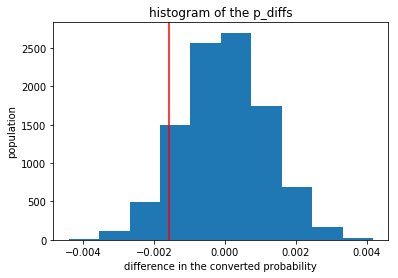

In [76]:
# plot distribution
plt.hist(p_diffs);
#Display title, x-label, and y-label in the chart.
plt.title("histogram of the p_diffs")
plt.xlabel('difference in the converted probability')
plt.ylabel('population')
# plot line for observed statistic
plt.axvline(obs_diff,color='r')


**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [77]:
(p_diffs>obs_diff).mean()

0.90790000000000004

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages?

>**Put your answer here.**
- this value is called p value.
- since the value is greater than "Type I error rate (0.05)" , then we fail to reject the null hyposis,which means both old_page and new_page have the same coversion rate >>Pnew=Pold=Ppopulation .



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [78]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = (df2.query('landing_page=="old_page" and converted==1')).shape[0]

# number of conversions with the new_page
convert_new = (df2.query('landing_page=="new_page" and converted==1')).shape[0]

# number of individuals who were shown the old_page
n_old = df2[df2['landing_page']=='old_page'].shape[0]

# number of individuals who received new_page
n_new = df2[df2['landing_page']=='new_page'].shape[0]

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.

>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 




Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

>**Tip**: You don't have to dive deeper into z-test for this exercise. **Try having an overview of what does z-score signify in general.** 

In [79]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
#count_array : represents the number of "converted" for each group
count_array=np.array([convert_old,convert_new])
#nobs_array : represents the total number of observations (rows) in each group
nobs_array=np.array([n_old,n_new])
#since in the previous part we calculated p value by (p_diffs are greater than the actual difference observed) so 
#we will use alterantive H1:'smaller'
z_score, p_value = sm.stats.proportions_ztest(count_array, nobs_array, alternative='smaller')

print(z_score, p_value)


1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>



>**Put your answer here.**
-  the Null hypothesis of this funcion is to specify the variance of the proportion estimate.
- **p-value**:The objective of this test is to find out whether the null hypothesis should be accepted or not.
- it is samilar to the previous p-value , and it is > 0.05 so we fail to reject null hyposthesis.
- **Z-Test**:The objective of this test is to check if the observations remain the same or not if the null hypothesis is true.
- since For a right-tailed test, reject null if  𝑍𝑠𝑐𝑜𝑟𝑒  >  𝑍𝛼 , and in our case 𝑍𝑠𝑐𝑜𝑟𝑒  <  𝑍𝛼  (1.3109<1.645 ) so we fail to reject the null  .

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Put your answer here.**
- since the target value 1,0 (conversion or no conversion) then it will be **logistic regression**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [80]:
#the intercept column
df2['intercept'] = 1
#dummy variable column, having a value 1 when an individual receives the treatment, otherwise 0
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
#check
df2.head()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [81]:
#import statsmodels 'already import in z-value'
import statsmodels.api as sm
#instantiate logistc regression model 
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
#fit the model
results = log_mod.fit()



Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [82]:
#summarzie the model
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-19 11:43 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  




>**Put your answer here.**

- 1- **y= b0 + b1x** >> converted= 1+b1ab_page   ,ab_page reperesent treatment where ab_page=1 incase of treatment and 0 otherwise.

- **H0: b1 = 0** >> there is no statistically significant relationship between the predictor variable, x, and the response variable, y, which refers to no relation between the 2 variables (converted & ab_page ).

- **H1: b1 ≠ 0**>>  here is a statistically significant relationship between x and y. which refers to there is a relation between the 2 variables (converted & ab_page ).

- 2-  hypothesis (Part II) is $p_{new}$ = $p_{old}$ so it is two-sided but in Part III is β1 = 0 so it is one-sided.

- 3- **p-value(0.1899)>0.05** so we fail to reject null hypothesis ( there is a relation between the 2 variables (converted & ab_page )) ,and it is not statistically significant for the same reason , and since convidence interval limits are close to zero so it is practical significant and H0 accepted.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**Put your answer here.**
- 1- the advantage of the multiple regression is the ability to determine the relative influence of one or more predictor variables to the criterion value.
- 2- the disadvantage is Multicollinearity which occurs when two or more independent variables are highly correlated with one another in a regression model. This means that an independent variable can be predicted from another independent variable in a regression model.
- Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.  

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 


 Provide the statistical output as well as a written response to answer this question.

In [83]:
# Read the countries.csv
# reading csv file
df3=pd.read_csv("countries.csv")
#take a look at the top few rows
df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [84]:
# Join with the df2 dataframe
df_merged=df2.set_index('user_id').join(df3.set_index('user_id'))
#check
df_merged.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [85]:
# Create the necessary dummy variables
df_merged[['CA','UK', 'US']] = pd.get_dummies(df_merged['country'])
#check
df_merged.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
user_id,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [86]:
# Fit your model, and summarize the results for countries
#import statsmodels 'already import in z-value'
import statsmodels.api as sm
#no need to add intercept column as it already exist
#instantiate logistc regression model 
log_mod2 = sm.Logit(df_merged['converted'], df_merged[['intercept','UK', 'US']])
#fit the model
results2 = log_mod2.fit()
#summarzie the model
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-19 11:43 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

- **y= b0+b2X2+b3X3** >> converted= 1+b2UK+b3US   

- **H0: b2=b3= 0** >> none of the predictor variables have a statistically significant relationship with the response variable, y , which refers to no relation between the predict variable and resonce variables. 

- **H1: b2=b3 ≠ 0** >> the predictor variables have a statistically significant relationship with the response variable, y ,  which refers to there is a relation between the predict variable and resonce variables.

- **p-value:**


- p-value for 'UK'(0.0745)>0.05 so we fail to reject null hypothesis ( there is a relation between the 2 variables (converted & UK )),and it is not statistically significant for the same reason, and since convidence interval limits are close to zero so it is practical significant and H0 accepted.

- p-value for 'US'(0.1295)>0.05 so we fail to reject null hypothesis ( there is a relation between the 2 variables (converted & US )),and it is not statistically significant for the same reason, and since convidence interval limits are close to zero so it is practical significant and H0 accepted.

- **Does it appear that country had an impact on conversion?** country columns confirm by p- value to accept the null hypothesis.

In [87]:
# Fit your model, and summarize the results for countries and page
#import statsmodels 'already import in z-value'
import statsmodels.api as sm
#no need to add intercept column as it already exist
#instantiate logistc regression model 
log_mod2 = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page','UK', 'US']])
#fit the model
results2 = log_mod2.fit()
#summarzie the model
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-19 11:43 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

- **y= b0+b1X1+b2X2+b3X3** >> converted= 1+b1ab_page+b2UK+b3US   ,ab_page reperesent treatment where ab_page=1 incase of treatment and 0 otherwise.

- **H0: b1=b2=b3= 0** >> none of the predictor variables have a statistically significant relationship with the response variable, y , which refers to no relation between the predict variable and resonce variables. 

- **H1: b1=b2=b3 ≠ 0** >> the predictor variables have a statistically significant relationship with the response variable, y ,  which refers to there is a relation between the predict variable and resonce variables.

- **p-value:**
- p-value for 'ab_page'(0.1912)>0.05 so we fail to reject null hypothesis ( there is a relation between the 2 variables (converted & ab_page )),and it is not statistically significant for the same reason , and since convidence interval limits are close to zero so it is practical significant and H0 accepted.

- p-value for 'UK'(0.0745)>0.05 so we fail to reject null hypothesis ( there is a relation between the 2 variables (converted & UK )),and it is not statistically significant for the same reason, and since convidence interval limits are close to zero so it is practical significant and H0 accepted.

- p-value for 'US'(0.1295)>0.05 so we fail to reject null hypothesis ( there is a relation between the 2 variables (converted & US )),and it is not statistically significant for the same reason, and since convidence interval limits are close to zero so it is practical significant and H0 accepted.


**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 




In [88]:
#create the iteraction term x1x2,x1x3>>(ab_page*UK,ab_page*US)
#first create the new columns
#create ab_page*UK
df_merged['UK_ab_page'] = df_merged['UK'] * df_merged['ab_page']
#create ab_page*Us
df_merged['US_ab_page'] = df_merged['US'] * df_merged['ab_page']
#check 
df_merged.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,UK_ab_page,US_ab_page
user_id,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0


In [89]:
# Fit your model, and summarize the results
#import statsmodels 'already import in z-value'
import statsmodels.api as sm
#no need to add intercept column as it already exist
#instantiate logistc regression model 
log_mod2 = sm.Logit(df_merged['converted'], df_merged[['intercept', 'UK_ab_page', 'US_ab_page']])
#fit the model
results2 = log_mod2.fit()
#summarzie the model
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-19 11:44 AIC:              212781.7674
No. Observations:   290584           BIC:              212813.5064
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9926    0.0079  -252.9104  0.0000  -2.0081  -1.9772
UK_ab_page    0.0112    0.0179     0.6256  0.5316  -0.0240   0.0464
US_ab_page   -0.0144    0.0125    -1.1548  0.2482  -0.0389   0.0101
==================================================================

"""

>**Put your conclusion answer here.**



- Mathematically, an interaction is created by multiplying two variables by one another and adding this term t othe regression model.
- **y= b0+b4X1*X2+b5X1*X3** >> converted= 1+b4ab_page*UKK+b5ab_page*US   

- **H0: b4=b5= 0** >> none of the predictor variables have a statistically significant relationship with the response variable, y , which refers to no relation between the predict variable and resonce variables. 

- **H1: b4=b5 ≠ 0** >> the predictor variables have a statistically significant relationship with the response variable, y ,  which refers to there is a relation between the predict variable and resonce variables.

- **p-value:**


- p-value for ''UK_ab_page'(0.5316)>0.05 so we fail to reject null hypothesis ( there is a relation between the 2 variables (converted & UK )),and it is not statistically significant for the same reason, and since convidence interval limits are close to zero so it is practical significant and H0 accepted.

- p-value for ''UK_ab_page'(0.5316)>0.05 so we fail to reject null hypothesis ( there is a relation between the 2 variables (converted & US )),and it is not statistically significant for the same reason, and since convidence interval limits are close to zero so it is practical significant and H0 accepted.
- **as we notice** the p-value is even greater than the previous p-value of US,UK,ab_page which confirm that we faill to reject the null hypothesis.

  **At the end:** 
- according to the result we got for the A/B test and regression and since - p-value >0.05 so we fail to reject null hypothesis, and it is not statistically significant for the same reason, and since confidence interval limits are close to zero so it is practically significant and H0 accepted.

- so I think the company should not implement the new page and stick to the old one.
- since we don't have the whole scenario in terms of the duration of implementing this test and gathering data and the data we lost during the cleaning phase.